In [297]:
#@title imports 
import os
import pickle
from typing import Set
# from jedi import settings
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt
from numpy.lib.function_base import append 
import scipy.io as spio
from scipy.io import loadmat, savemat
import importlib.util
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from scipy.sparse import data 
# from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
# from plotnine.data import mtcars
import pandas as pd 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import SparsePCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sknetwork.clustering import Louvain,get_modularity
from sknetwork.data import karate_club
import sys 
sys.path.append('C:/Users/Nishant Joshi/Downloads/Old_code/repo/single_cell_analysis/scripts')
from sknetwork.clustering import Louvain,get_modularity
from sknetwork.data import karate_club
from UMAP import *

In [298]:

def plot_UMAP_clusters_single(data_inh, neighbours,distance,labels, res_louvain, random_state, c_list ,use_kmeans=False,save=False):
    """plots UMAP for excitatory and inhibitory cells 

    Args:
        data_inh (ndarray): cell X feature matrix for inhibitory cells
        data_exc (ndarray): cell X feature matrix for excitatory cells
        c_exc (array): _description_
        c_inh (array): _description_
        neighbours (int): number of neares neighbours
        distance (float): minimum distance between points
    """
    data_umap_scaler = StandardScaler()
    data_umap = data_umap_scaler.fit_transform(data_inh)
    data_umap = normalize(data_umap)
 
    neighbours = neighbours
    dist = distance
    reducer = umap.UMAP(n_neighbors=neighbours,min_dist=dist,random_state=random_state)
    mapper = reducer.fit(data_umap)

    fig = plt.figure(figsize=[8,8])
    ax12d = fig.add_subplot(1,1,1)
    
    louvain = Louvain(resolution=res_louvain,random_state=random_state)
    adjacency = mapper.graph_
    labels_exc = louvain.fit_predict(adjacency)


    clusterable_embedding2d_exc = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data_umap)



    df_2d_exc = {'UMAP1':clusterable_embedding2d_exc[:, 0],
             'UMAP2':clusterable_embedding2d_exc[:, 1],
             'class':labels_exc}

    ax12d.set_xticks([])
    ax12d.set_yticks([])

    sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',palette=c_list[1:len(set(labels_exc))+1],ax=ax12d)
    # sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',ax=ax12d)

    # ax12d.set_title('UMAP clusters for excitatory neurons 2D')
    ax12d.legend()
    if save:
        plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/exc_umap_cluster.png',dpi=200)
    
    plt.show()

    return labels_exc

In [299]:
pal = ["#00202e","#003f5c","#2c4875","#8a508f","#bc5090","#ff6361","#ff8531","#ffa600","#ffd380"]

In [300]:

waveforms = pickle.load(open('G:/My Drive/Cluster Feature files/waveforms.p','rb'))
waveforms_exc = np.array(waveforms['exc'])
waveforms_inh = np.array(waveforms['inh'])

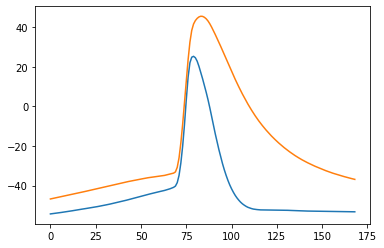

In [301]:
plt.plot(np.mean(np.array(waveforms_inh[:,:169],dtype=np.float64),axis=0))
plt.plot(np.mean(np.array(waveforms_exc[:,:169],dtype=np.float64),axis=0))

In [302]:
waveform_combined = np.concatenate((waveforms_exc,waveforms_inh),axis=0)
waveform_combined.shape

(886, 172)

In [303]:
df_waves = pd.DataFrame(columns=['waveforms','condition','exp_name'])
for i in range(len(waveform_combined)):
    df_waves.loc[i,'waveforms'] = np.array(waveform_combined[i,:169],dtype=np.float64)
    df_waves.loc[i,'condition'] = waveform_combined[i,170]
    df_waves.loc[i,'exp_name']  = waveform_combined[i,171]
df_waves_acsf = df_waves[df_waves.condition.isin(['aCSF','ACSF'])]

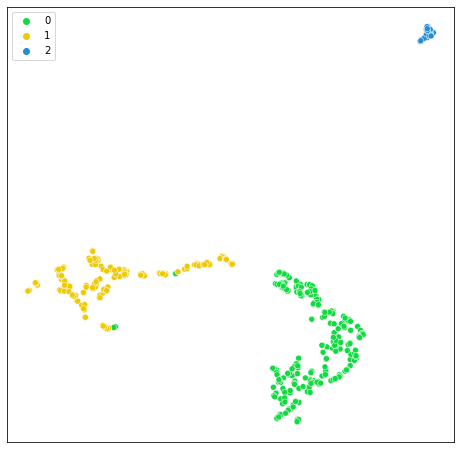

In [304]:

waves = normalize(np.vstack(df_waves_acsf['waveforms']))
labels_wave = plot_UMAP_clusters_single(waves,
                          15,
                          0.0,
                          random_state =24,
                          res_louvain = 0.09,
                          use_kmeans = True,
                          c_list =GMM_PAL,
                          labels=np.repeat('acsf',len(exc_df_acsf)),
                          )

In [305]:
df_waves_acsf['labels'] = labels_wave
df_waves_acsf

<ipython-input-305-fcc0375871c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_waves_acsf['labels'] = labels_wave


,waveforms,condition,exp_name,labels
0,"[-42.39658509537936, -42.25354377641199, -42.1...",aCSF,NC_170711_aCSF_D1ago_E1,0
1,"[-42.00564968889042, -41.91154647502775, -41.7...",aCSF,NC_170711_aCSF_D1ago_E1,0
2,"[-52.319933683987855, -52.05997415145055, -51....",aCSF,NC_170711_aCSF_D1ago_E2,0
4,"[-44.3112696337653, -44.242371915010956, -44.0...",aCSF,NC_170712_aCSF_D1ago_E1,0
5,"[-29.719481002321544, -29.489948852695743, -29...",aCSF,NC_170712_aCSF_D1ago_E2,0
...,...,...,...,...
873,"[-60.17497069071394, -60.07396287303469, -60.0...",ACSF,xuan_9-5-19_E1,1
875,"[-54.29433135445728, -54.170348798466286, -54....",ACSF,xuan_9-5-19_E3,1
877,"[-48.9878163181611, -48.87714724519227, -48.77...",ACSF,xuan_9-9-19_E1,1
880,"[-58.603949620629905, -58.492983247291434, -58...",ACSF,xuan_9-9-19_E3,1


Plotting: 471 Waveforms


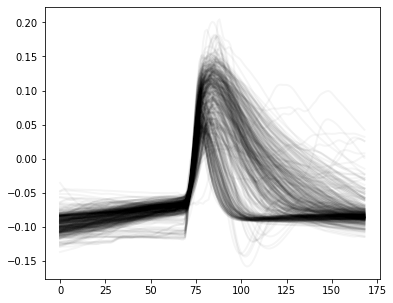

In [307]:
full_data = normalize(np.vstack(df_waves_acsf['waveforms']))
f, arr = plt.subplots(1,figsize=[6,5])

print( "Plotting: " + str(full_data.shape[0]) + " Waveforms")
for i in range(0,full_data.shape[0]):
    arr.plot(full_data[i], c = 'k', alpha = 0.04,linewidth=2.);    
plt.show()    

Plotting: 249 Waveforms
Plotting: 196 Waveforms
Plotting: 26 Waveforms


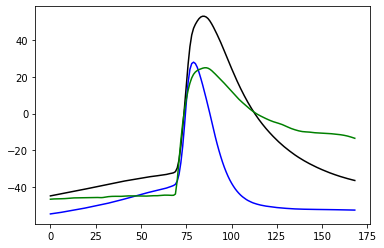

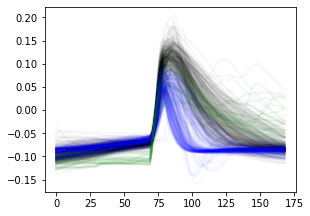

In [315]:
plt.plot(np.mean(df_waves_acsf[df_waves_acsf.labels==0]['waveforms']),c='k')
plt.plot(np.mean(df_waves_acsf[df_waves_acsf.labels==1]['waveforms']),c='b')
plt.plot(np.mean(df_waves_acsf[df_waves_acsf.labels==2]['waveforms']),c='g')


f, arr = plt.subplots(1,figsize=[4.5,3.4])

full_data = normalize(np.vstack(df_waves_acsf[df_waves_acsf.labels==0]['waveforms']))
print( "Plotting: " + str(full_data.shape[0]) + " Waveforms")
for i in range(0,full_data.shape[0]):
    arr.plot(full_data[i], c = 'k', alpha = 0.03,linewidth=2.);

full_data = normalize(np.vstack(df_waves_acsf[df_waves_acsf.labels==1]['waveforms']))
print( "Plotting: " + str(full_data.shape[0]) + " Waveforms")
for i in range(0,full_data.shape[0]):
    arr.plot(full_data[i], c = 'b', alpha = 0.03,linewidth=2.);

full_data = normalize(np.vstack(df_waves_acsf[df_waves_acsf.labels==2]['waveforms']))
print( "Plotting: " + str(full_data.shape[0]) + " Waveforms")
for i in range(0,full_data.shape[0]):
    arr.plot(full_data[i], c = 'g', alpha = 0.06,linewidth=2.);    
        

In [ ]:
list(set(df_waves_acsf[df_waves_acsf.labels==1]['exp_name']))

['xuan_16-9-19_E4',
 'NC_171010_aCSF_D1ago_E3',
 'NC_170814_aCSF_D1ago_E9',
 'asli_25-7-19_E4',
 'NC_170626_aCSF_D1ago_E2',
 'NC_171220_aCSF_D1ago_E1',
 'NC_170801_aCSF_D1ago_E2',
 'NC_170815_aCSF_D1ago_E6',
 'xuan_9-9-19_E4',
 'NC_170626_aCSF_D1ago_E4',
 'xuan_10-5-19_E4',
 'Payam_02-10-19_E6',
 'xuan_24-5-19_E4',
 'xuan_9-9-19_E3',
 'NC_170620_DopD2D1_E1',
 'xuan_6-12-18_E2',
 'NC_170717_aCSF_DopD2D1_E1',
 'NC_170725_aCSF_DopD2D1_E3',
 'xuan_10-5-19_E6',
 'asli_6-8-19_E4',
 'NC_170830_aCSF_D1ago_E4',
 'asli_18-7-19_E1',
 'NC_170626_aCSF_D1ago_E1',
 'xuan_14-1-19_E3',
 'xuan_26-6-19_E5',
 'NC_170725_aCSF_DopD2D1_E2',
 'Payam_16-10-19_E5',
 'xuan_10-5-19_E5',
 'NC_170630_aCSF_D1ago_E4',
 'xuan_22-1-19_E2',
 'xuan_15-5-19_E2',
 'xuan_27-3-19_E2',
 'Payam_26-9-19_E3',
 'NC_171110_aCSF_D1ago_E3',
 'Payam_25-9-19_E1',
 'Payam_16-10-19_E3',
 'NC_171207_aCSF_E1',
 'asli_31-7-19_E1',
 'NC_170623_aCSF_D1ago_E4',
 'NC_170811_aCSF_D1ago_E2',
 'xuan_14-3-19_E3',
 'NC_171207_aCSF_E4',
 'xuan_29-3-

In [ ]:
# features_ext = ['Vm_avg', 'dvdt_p', 'dvdt_n', 'avg_V', 'resistance', 'thr',
#                 'adaptation','isi','peak','peak_adaptation','ap_width', 'hyp_value',
#                 'fist_spike','up_down_ratio', 'isi_adaptation', 'thr_adp_ind', 'psth',
#                 'int_fr','fr', 'sub_thr','mi','spk_fr_adp','imp','cond','exp_name']

features_ext = ['AP_avg', 'dvdt_p','dvdt_n','avg_V','resistance','thr','adaptation','isi','peak',
                'peak_adaptation','ap_width', 'hyp_value','fist_spike','up_down_ratio','isi_adaptation',
                'thr_adp_ind','psth','int_fr','fr', 'sub_thr','mi','spk_fr_adp','imp','exp_name','cond' ]               
data_all_conds = pickle.load(open('G:/My Drive/Cluster Feature files/all_acsf_ephys_with_MI_new_res.p','rb'))
exc = data_all_conds['exc']
inh = data_all_conds['inh']
def return_resitance(data):
    return data[0]

exc_df_all = pd.DataFrame(exc,columns = features_ext)
exc_df_all.resistance = exc_df_all.resistance.apply(return_resitance)

exc_df_all = exc_df_all.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
exc_df_acsf = pd.concat((exc_df_all.groupby('cond').get_group('aCSF'),
                    exc_df_all.groupby('cond').get_group('ACSF')))

inh_df_all = pd.DataFrame(inh,columns = features_ext)
inh_df_all.resistance = inh_df_all.resistance.apply(return_resitance)

inh_df = inh_df_all.replace([np.inf, -np.inf], np.nan)
inh_df = inh_df.dropna(axis=0)
inh_df_acsf = pd.concat((inh_df.groupby('cond').get_group('aCSF'),
                    inh_df.groupby('cond').get_group('ACSF')))


In [ ]:
exc_inh_df = pd.concat([exc_df_acsf,inh_df_acsf])
exc_inh_df['ei_type'] = np.concatenate((np.repeat('exc',len(exc_df_acsf)),np.repeat('inh',len(inh_df_acsf)))) 
exc_inh_df = exc_inh_df[exc_inh_df.resistance>0] 
exc_inh_df


,AP_avg,dvdt_p,dvdt_n,avg_V,resistance,thr,adaptation,isi,peak,peak_adaptation,...,psth,int_fr,fr,sub_thr,mi,spk_fr_adp,imp,exp_name,cond,ei_type
1,19.422547,7.887402,-1.842780,-71.394475,0.049878,-31.621822,0.020419,40208.778409,54.879414,0.014737,...,1.296552,0.001869,0.590000,-71.439135,0.165635,0.000000,0.018043,NC_170711_aCSF_D1ago_E1,aCSF,exc
2,19.575796,8.803019,-2.064160,-73.677506,0.065845,-32.975678,0.011212,16505.668981,56.968894,0.002025,...,3.551724,0.000747,1.560000,-73.811706,0.283034,-0.020833,0.019335,NC_170711_aCSF_D1ago_E2,aCSF,exc
4,26.219333,6.395475,-1.608403,-74.167850,0.048788,-31.495817,0.006696,55455.103175,55.499508,-0.003224,...,0.917241,0.000283,0.383333,-74.201296,0.129427,0.000000,0.015327,NC_170712_aCSF_D1ago_E1,aCSF,exc
5,20.177337,4.413538,-1.718369,-75.723965,0.120737,-27.023575,0.003860,42075.688235,46.052266,-0.014522,...,4.234483,0.001610,1.870000,-75.873648,0.361758,-0.006944,0.023991,NC_170712_aCSF_D1ago_E2,aCSF,exc
8,23.400372,6.409955,-1.516797,-72.526460,0.050701,-36.090445,0.016455,34354.265700,49.261118,0.015851,...,1.441379,0.000268,0.623333,-72.578996,0.249458,-0.006944,0.013927,NC_170713_aCSF_DopD2D1_E3,aCSF,exc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,-25.214860,7.014993,-2.991359,-76.089694,0.156441,-43.157711,0.002199,1164.071013,44.399437,-0.006187,...,42.772414,0.002961,17.227778,-77.246217,0.666565,-0.361111,0.027835,xuan_9-5-19_E1,ACSF,inh
295,-34.171348,5.895947,-5.932909,-71.734493,0.064017,-44.713881,-0.006265,16693.946387,58.497020,-0.008887,...,2.965517,0.000365,1.194444,-71.799820,0.121993,-0.013889,0.023391,xuan_9-5-19_E3,ACSF,inh
297,-14.056022,8.035465,-2.489632,-69.251156,0.115075,-33.404611,0.002397,2208.115373,46.915836,-0.007422,...,22.620690,0.002211,9.111111,-69.803774,0.523594,-0.173611,0.025939,xuan_9-9-19_E1,ACSF,inh
300,-38.409256,4.409547,-5.754911,-73.832605,0.072956,-44.666920,-0.009161,8306.411356,65.255172,0.010972,...,5.965517,0.000812,2.402778,-73.961651,0.224878,-0.020833,0.019857,xuan_9-9-19_E3,ACSF,inh


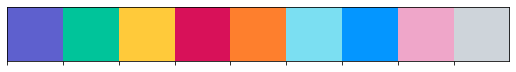

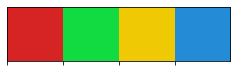

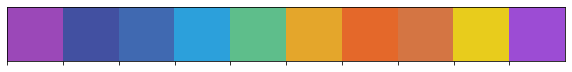

In [ ]:

CUSTOM_PAL_SORT_3 = ['#5e60ce','#00c49a','#ffca3a','#D81159','#fe7f2d','#7bdff2','#0496ff','#efa6c9','#ced4da']
GMM_PAL = ['#d62424','#12db41','#f0c905','#248cd6']

# In RGB form
coherence_colors = [[0.609, 0.283, 0.724],
                    [0.259,	0.314, 0.635],
                    [0.251,	0.412, 0.698],
                    [0.176,	0.631, 0.859],
                    [0.369,	0.749, 0.549],
                    [0.898,	0.654, 0.169],
                    [0.898,	0.41 , 0.165],
                    [0.834,	0.46 , 0.265],
                    [0.912,	0.8 , 0.112],
                    [0.612,	0.3 , 0.834]]
sns.palplot(CUSTOM_PAL_SORT_3)
sns.palplot(GMM_PAL)
sns.palplot(coherence_colors)

In [ ]:
feat = ['AP_avg', 'resistance','ap_width','thr','isi', 'sub_thr', 'imp']

data_umap_scaler = StandardScaler()
data_umap = data_umap_scaler.fit_transform(exc_inh_df[feat])
data_umap = normalize(data_umap)

neighbours = 20
dist = 0.0
random_state = 42
reducer = umap.UMAP(n_neighbors=neighbours,min_dist=dist,random_state=random_state)
mapper = reducer.fit(data_umap)


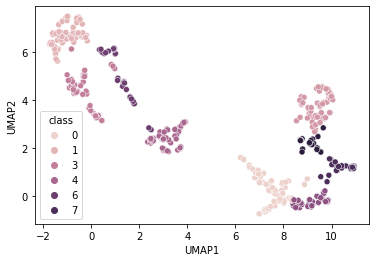

In [ ]:
mods = []

# for res in np.arange(0.5,3.5,0.3):
louvain = Louvain(resolution=1.,random_state=random_state)
adjacency = mapper.graph_
labels = louvain.fit_predict(adjacency)
mods.append((res, get_modularity(adjacency,labels)))

clusterable_embedding2d_exc =reducer.fit_transform(data_umap)


df_2d_exc = {'UMAP1':clusterable_embedding2d_exc[:, 0],
        'UMAP2':clusterable_embedding2d_exc[:, 1],
        'class':labels}
sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class')
plt.show()

In [ ]:
inh_df_acsf

,AP_avg,dvdt_p,dvdt_n,avg_V,resistance,thr,adaptation,isi,peak,peak_adaptation,...,psth,int_fr,fr,sub_thr,mi,spk_fr_adp,imp,exp_name,cond,ei_type
42,1.897682,3.798707,-1.289762,-72.751108,0.083729,-29.506180,0.002763,8949.334994,23.694574,-0.043470,...,9.724138,0.002700,4.483333,-72.993073,0.447151,-0.097222,0.024524,NC_170725_aCSF_DopD2D1_E2,acsf,exc
45,-9.265203,7.310535,-2.363548,-76.944684,0.076532,-34.261047,0.003439,11467.459330,39.959893,-0.004835,...,4.537931,0.000763,1.900000,-77.097890,0.322099,-0.062500,0.018075,NC_170811_aCSF_D1ago_E2,acsf,exc
69,-34.381455,3.810139,-2.910631,-71.813373,0.080446,-39.125866,-0.001648,2769.257891,31.243964,-0.004896,...,18.758621,0.001814,7.473333,-72.133629,0.634430,-0.083333,0.021306,NC_170830_aCSF_D1ago_E1,acsf,exc
70,-36.188967,3.640791,-2.926581,-72.699855,0.086649,-38.919740,0.000579,3333.902688,29.620831,0.000188,...,15.689655,0.001639,6.356667,-72.955122,0.598316,-0.076389,0.020904,NC_170830_aCSF_D1ago_E1,acsf,exc
76,6.919826,5.134730,-1.835207,-72.432379,0.092726,-31.463892,0.005373,6876.655139,38.693288,-0.027948,...,8.937931,0.002991,3.653333,-72.726695,0.363887,-0.041667,0.021657,NC_170830_aCSF_D1ago_E4,acsf,exc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,-25.214860,7.014993,-2.991359,-76.089694,0.156441,-43.157711,0.002199,1164.071013,44.399437,-0.006187,...,42.772414,0.002961,17.227778,-77.246217,0.666565,-0.361111,0.027835,xuan_9-5-19_E1,acsf,inh
295,-34.171348,5.895947,-5.932909,-71.734493,0.064017,-44.713881,-0.006265,16693.946387,58.497020,-0.008887,...,2.965517,0.000365,1.194444,-71.799820,0.121993,-0.013889,0.023391,xuan_9-5-19_E3,acsf,inh
297,-14.056022,8.035465,-2.489632,-69.251156,0.115075,-33.404611,0.002397,2208.115373,46.915836,-0.007422,...,22.620690,0.002211,9.111111,-69.803774,0.523594,-0.173611,0.025939,xuan_9-9-19_E1,acsf,inh
300,-38.409256,4.409547,-5.754911,-73.832605,0.072956,-44.666920,-0.009161,8306.411356,65.255172,0.010972,...,5.965517,0.000812,2.402778,-73.961651,0.224878,-0.020833,0.019857,xuan_9-9-19_E3,acsf,inh


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


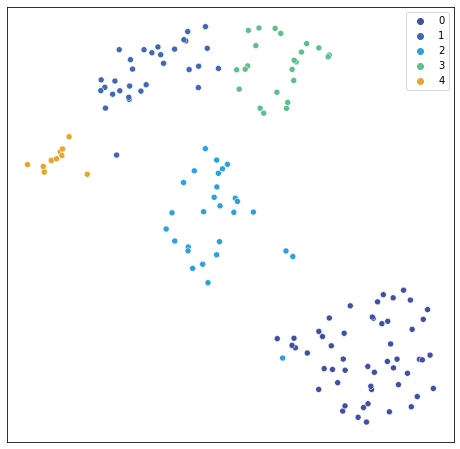

In [ ]:


def lower(data):
    return data.lower()
inh_df_acsf = exc_inh_df[exc_inh_df.ei_type=='inh']
feat = ['AP_avg','resistance','ap_width','thr','isi', 'sub_thr', 'imp']
inh_df_acsf.cond = inh_df_acsf.cond.apply(lower)
# inh_df_acsf = inh_df_acsf.drop_duplicates(subset='exp_name')

labels_inh = plot_UMAP_clusters_single(inh_df_acsf[feat],
                          20,
                          0.0,
                          random_state =20,
                          res_louvain = 1.0,
                          use_kmeans = False,
                          c_list = coherence_colors,
                          labels=np.repeat('acsf',len(inh_df_acsf)),
                          )

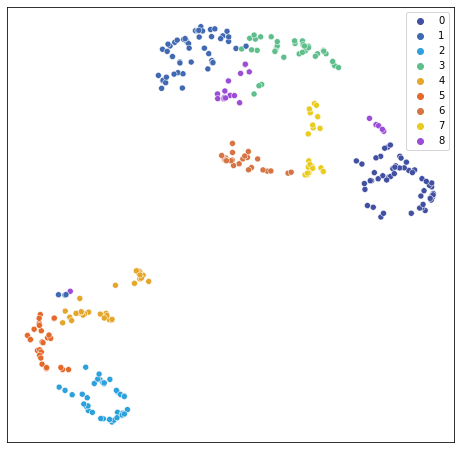

In [ ]:
exc_df_acsf = exc_inh_df[exc_inh_df.ei_type=='exc']

labels_exc = plot_UMAP_clusters_single(exc_df_acsf[feat],
                          20,
                          0.0,
                          random_state =20,
                          res_louvain = 1.0,
                          use_kmeans = False,
                          c_list = coherence_colors,
                          labels=np.repeat('acsf',len(exc_df_acsf)),
                          )

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
def get_confusion_matrix(data,feat):
    
    testSize = 0.3;
    RAND_STATE = 42
    UMAP_X = np.stack(data[feat].to_numpy().tolist(), axis=0)
    UMAP_y = data['labels'].to_numpy()

    unclassified_ixs = [ix for ix,clust in enumerate(UMAP_y) if clust == -1]

    UMAP_X = np.delete(UMAP_X,unclassified_ixs,axis=0)
    UMAP_y = np.delete(UMAP_y,unclassified_ixs,axis=0)

    UMAP_X_train, UMAP_X_test, UMAP_y_train, UMAP_y_test = train_test_split(UMAP_X, UMAP_y, test_size=testSize, random_state=RAND_STATE)


    numCV = 5

    UMAP_model = xgb.XGBClassifier()
    UMAP_param_dist = {"max_depth": [4],
                "min_child_weight" : [2.5],
                "n_estimators": [100],
                "learning_rate": [0.3],
                "seed": [RAND_STATE]}
    UMAP_grid_search = GridSearchCV(UMAP_model, param_grid=UMAP_param_dist, 
                            cv = numCV, 
                            verbose=10, n_jobs=-1)
    UMAP_grid_search.fit(UMAP_X_train, UMAP_y_train)

    return  confusion_matrix(UMAP_y_test,UMAP_grid_search.predict(UMAP_X_test))
inh_df_acsf['labels'] = labels_inh
get_confusion_matrix(inh_df_acsf,feat)

<ipython-input-289-3b6ecc7fa6a1>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inh_df_acsf['labels'] = labels_inh


Fitting 5 folds for each of 1 candidates, totalling 5 fits


array([[12,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0],
       [ 0,  1,  6,  0,  0],
       [ 0,  0,  4,  6,  0],
       [ 1,  0,  0,  0,  5]], dtype=int64)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


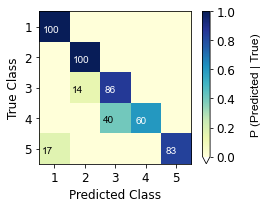

In [ ]:
def plot_confusion_matrix(conf_matrix,labels):
    confusion_mat_counts = conf_matrix
    N_CLUST = len(set(labels))
    conf_mat_row_list = []

    for row in confusion_mat_counts:
        row_sum = np.sum(row)
        
        row_percent = []
        
        for val in row:
            row_percent.append(val/row_sum)
        
        conf_mat_row_list.append(row_percent)

    conf_mat = np.array(conf_mat_row_list)

    colormap = mpl.cm.YlGnBu
    colormap.set_under('white')

    eps = np.spacing(0.0)
    f, arr = plt.subplots(1,figsize=[4,3])
    mappable = arr.imshow(conf_mat,cmap=colormap,vmin=eps,vmax=1.)
    color_bar = f.colorbar(mappable, ax=arr, extend='min')
    color_bar.set_label('P (Predicted | True)',fontsize=12,labelpad=15,fontname="Arial")
    color_bar.ax.tick_params(size=3,labelsize=12)

    #Specify label behavior of the main diagonal
    for i in range(0,N_CLUST):
        if int(conf_mat[i,i]*100) == 100:
            arr.text(i-0.38,i+0.17,int(round(conf_mat[i,i]*100)),fontsize=10,c='white',fontname="Arial")
        else:
            arr.text(i-0.34,i+0.16,int(round(conf_mat[i,i]*100)),fontsize=10,c='white',fontname="Arial")
            
    #Specify label behavior of the off-diagonals
    for i in range(0,N_CLUST):
        for j in range(0,N_CLUST):
            if conf_mat[i,j] < 0.1 and conf_mat[i,j] != 0:
                arr.text(j-0.2,i+0.15,int(round(conf_mat[i,j]*100)),fontsize=10,c='k',fontname="Arial")
            elif conf_mat[i,j] >= 0.1 and conf_mat[i,j] < 0.5 and conf_mat[i,j] != 0:
                arr.text(j-0.4, i+0.15,int(round(conf_mat[i,j]*100)),fontsize=10,c='k',fontname="Arial")

    arr.set_xticks(range(0,N_CLUST))
    arr.set_xticklabels(range(1,N_CLUST+1),fontsize=12);
    arr.set_yticks(range(0,N_CLUST))
    arr.set_yticklabels(range(1,N_CLUST+1),fontsize=12);
    arr.set_xlabel('Predicted Class',fontsize=12);
    arr.set_ylabel('True Class',fontsize=12);
    plt.tight_layout()

plot_confusion_matrix(get_confusion_matrix(inh_df_acsf,feat),labels_inh)    

<ipython-input-292-61ea006fe723>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exc_df_acsf['labels'] = labels_exc


Fitting 5 folds for each of 1 candidates, totalling 5 fits


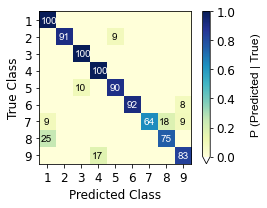

In [ ]:
exc_df_acsf['labels'] = labels_exc

plot_confusion_matrix(get_confusion_matrix(exc_df_acsf,feat),labels_exc)    


0.0

0.5

1.0

1.5

2.0

2.5

3.0

3.5

4.0

4.5

5.0


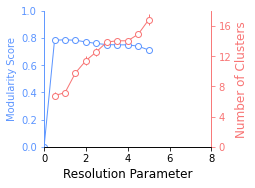

In [ ]:
resolution_list = np.linspace(0,5,11)
modularity_dict = {}
n_clusts_dict = {}
#Louvain Clustering Parameters
RESOLUTION = 1.5
random_state = 42
full_data = inh_df_acsf[feat]
# BLUE COLOR
BlueCol = '\033[94m'
subsets=[100]
import random 
for res in resolution_list:
    print("\n" + BlueCol + str(res))
    for frac in subsets:
        rand_list = []
        n_clusts = []
        for i in list(range(1,25)):
            reducer_rand_test = umap.UMAP(n_neighbors = 20, 
                                     min_dist=0.0, 
                                     random_state=random.randint(1,100000))
            rand_data = np.random.permutation(full_data)[0:(int(len(full_data)*frac)),:]
            mapper = reducer_rand_test.fit(rand_data)
            embedding_rand_test = reducer_rand_test.transform(rand_data)

            umap_df_rand_test = pd.DataFrame(embedding_rand_test, columns=('x', 'y'))
            louvain = Louvain(resolution=res,random_state=random_state)
            adjacency = mapper.graph_
            labels_exc = louvain.fit_predict(adjacency)
            clustering_solution = labels_exc
            modularity= get_modularity(adjacency,labels_exc)
            rand_list.append(modularity)
            n_clusts.append(len(set(clustering_solution)))
        modularity_dict.update({str(res): rand_list})
        n_clusts_dict.update({str(res): n_clusts})


resolution_list = np.linspace(0,5,11)

if 'n_clusts_dict' not in list(locals().keys()):
  n_clusts_dict = pkl.load(open('WaveMAP_Paper/data/n_clusts_dict.pkl','rb'))

if 'modularity_dict' not in list(locals().keys()):
  modularity_dict = pkl.load(open('WaveMAP_Paper/data/modularity_dict.pkl','rb'))

avg_n_clusts = []
for k in list(n_clusts_dict.keys()):
    avg_n_clusts.append(np.mean(n_clusts_dict[k]))
    
std_n_clusts = []
for k in list(n_clusts_dict.keys()):
    std_n_clusts.append(np.std(n_clusts_dict[k]))
    
std_modularity = []
for k in list(modularity_dict.keys()):
    std_modularity.append(np.std(modularity_dict[k]))
    
avg_modularity = []
for k in list(modularity_dict.keys()):
    avg_modularity.append(np.mean(modularity_dict[k]))

f, ax1 = plt.subplots(figsize=[3,2.5])

ax1.errorbar(resolution_list,avg_modularity,yerr=std_modularity,
             c = '#5c95ff', marker='o', fillstyle='full', markerfacecolor='w', 
             linewidth=1, markeredgewidth=1)
ax1.set_ylabel('Modularity Score')
ax1.set_xlabel('Resolution Parameter',fontsize=12)
ax1.set_xlim([0,8])
ax1.set_xticks([0,2,4,6,8])
ax1.yaxis.label.set_color('#5c95ff')
ax1.tick_params(axis='y',colors='#5c95ff')
ax1.set_ylim(0,1.0)
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
# ax1.set_yticklabels([0.0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0],fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_color('#f87575')
ax1.spines['left'].set_color('#5c95ff')

ax2 = ax1.twinx()
ax2.errorbar(resolution_list[1:],avg_n_clusts[1:],yerr=std_n_clusts[1:],
            c = '#f87575', marker='o', fillstyle='full', markerfacecolor='w', linewidth=1, markeredgewidth=1)
ax2.set_ylabel('Number of Clusters',fontsize=12,c='#f87575')
# ax2.spines['left'].set_color('b')
ax2.tick_params(axis='y',colors='#f87575')
ax2.set_ylim([0,18])
ax2.set_yticks([0,4,8,12,16]);
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_color('#f87575')
ax2.spines['left'].set_color('#5c95ff')

In [ ]:
testSize = 0.3;

UMAP_X = np.stack(umap_df['waveform'].to_numpy().tolist(), axis=0)
UMAP_y = umap_df['color'].to_numpy()

unclassified_ixs = [ix for ix,clust in enumerate(UMAP_y) if clust == -1]

UMAP_X = np.delete(UMAP_X,unclassified_ixs,axis=0)
UMAP_y = np.delete(UMAP_y,unclassified_ixs,axis=0)

UMAP_X_train, UMAP_X_test, UMAP_y_train, UMAP_y_test = train_test_split(UMAP_X, UMAP_y, test_size=testSize, random_state=RAND)




0.0

0.5

1.0

1.5

2.0

2.5

3.0

3.5

4.0

4.5

5.0


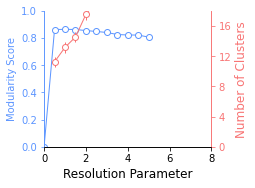

In [ ]:
resolution_list = np.linspace(0,5,11)
modularity_dict = {}
n_clusts_dict = {}
#Louvain Clustering Parameters
RESOLUTION = 1.5
random_state = 42
full_data = exc_df_acsf[feat]
# BLUE COLOR
BlueCol = '\033[94m'
subsets=[100]
import random 
for res in resolution_list:
    print("\n" + BlueCol + str(res))
    for frac in subsets:
        rand_list = []
        n_clusts = []
        for i in list(range(1,25)):
            reducer_rand_test = umap.UMAP(n_neighbors = 20, 
                                     min_dist=0.0, 
                                     random_state=random.randint(1,100000))
            rand_data = np.random.permutation(full_data)[0:(int(len(full_data)*frac)),:]
            mapper = reducer_rand_test.fit(rand_data)
            embedding_rand_test = reducer_rand_test.transform(rand_data)

            umap_df_rand_test = pd.DataFrame(embedding_rand_test, columns=('x', 'y'))
            louvain = Louvain(resolution=res,random_state=random_state)
            adjacency = mapper.graph_
            labels_exc = louvain.fit_predict(adjacency)
            clustering_solution = labels_exc
            modularity= get_modularity(adjacency,labels_exc)
            rand_list.append(modularity)
            n_clusts.append(len(set(clustering_solution)))
        modularity_dict.update({str(res): rand_list})
        n_clusts_dict.update({str(res): n_clusts})


resolution_list = np.linspace(0,5,11)

if 'n_clusts_dict' not in list(locals().keys()):
  n_clusts_dict = pkl.load(open('WaveMAP_Paper/data/n_clusts_dict.pkl','rb'))

if 'modularity_dict' not in list(locals().keys()):
  modularity_dict = pkl.load(open('WaveMAP_Paper/data/modularity_dict.pkl','rb'))

avg_n_clusts = []
for k in list(n_clusts_dict.keys()):
    avg_n_clusts.append(np.mean(n_clusts_dict[k]))
    
std_n_clusts = []
for k in list(n_clusts_dict.keys()):
    std_n_clusts.append(np.std(n_clusts_dict[k]))
    
std_modularity = []
for k in list(modularity_dict.keys()):
    std_modularity.append(np.std(modularity_dict[k]))
    
avg_modularity = []
for k in list(modularity_dict.keys()):
    avg_modularity.append(np.mean(modularity_dict[k]))



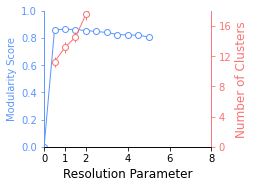

In [ ]:
f, ax1 = plt.subplots(figsize=[3,2.5])

ax1.errorbar(resolution_list,avg_modularity,yerr=std_modularity,
             c = '#5c95ff', marker='o', fillstyle='full', markerfacecolor='w', 
             linewidth=1, markeredgewidth=1)
ax1.set_ylabel('Modularity Score')
ax1.set_xlabel('Resolution Parameter',fontsize=12)
ax1.set_xlim([0,8])
ax1.set_xticks([0,1,2,4,6,8])
ax1.yaxis.label.set_color('#5c95ff')
ax1.tick_params(axis='y',colors='#5c95ff')
ax1.set_ylim(0,1.0)
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
# ax1.set_yticklabels([0.0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0],fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_color('#f87575')
ax1.spines['left'].set_color('#5c95ff')

ax2 = ax1.twinx()
ax2.errorbar(resolution_list[1:],avg_n_clusts[1:],yerr=std_n_clusts[1:],
            c = '#f87575', marker='o', fillstyle='full', markerfacecolor='w', linewidth=1, markeredgewidth=1)
ax2.set_ylabel('Number of Clusters',fontsize=12,c='#f87575')
# ax2.spines['left'].set_color('b')
ax2.tick_params(axis='y',colors='#f87575')
ax2.set_ylim([0,18])
ax2.set_yticks([0,4,8,12,16]);
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_color('#f87575')
ax2.spines['left'].set_color('#5c95ff')

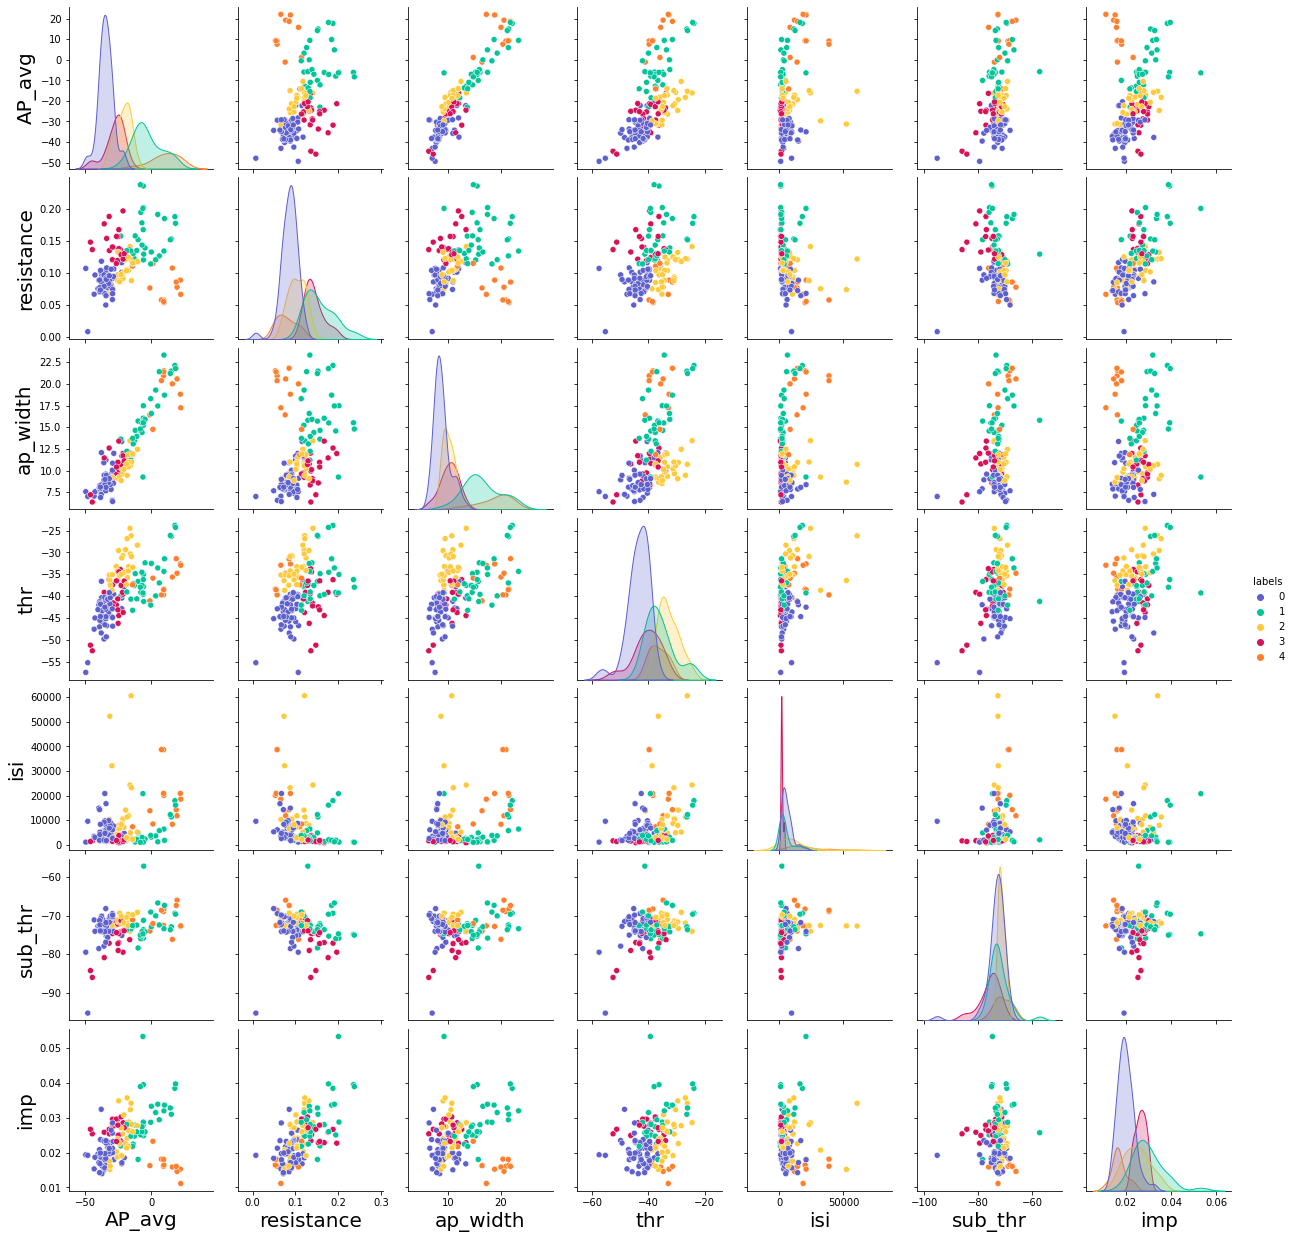

In [309]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(inh_df_acsf[['AP_avg','resistance','ap_width','thr','isi', 'sub_thr', 'imp','labels']],hue='labels',palette=CUSTOM_PAL_SORT_3[:len(set(inh_df_acsf['labels']))])


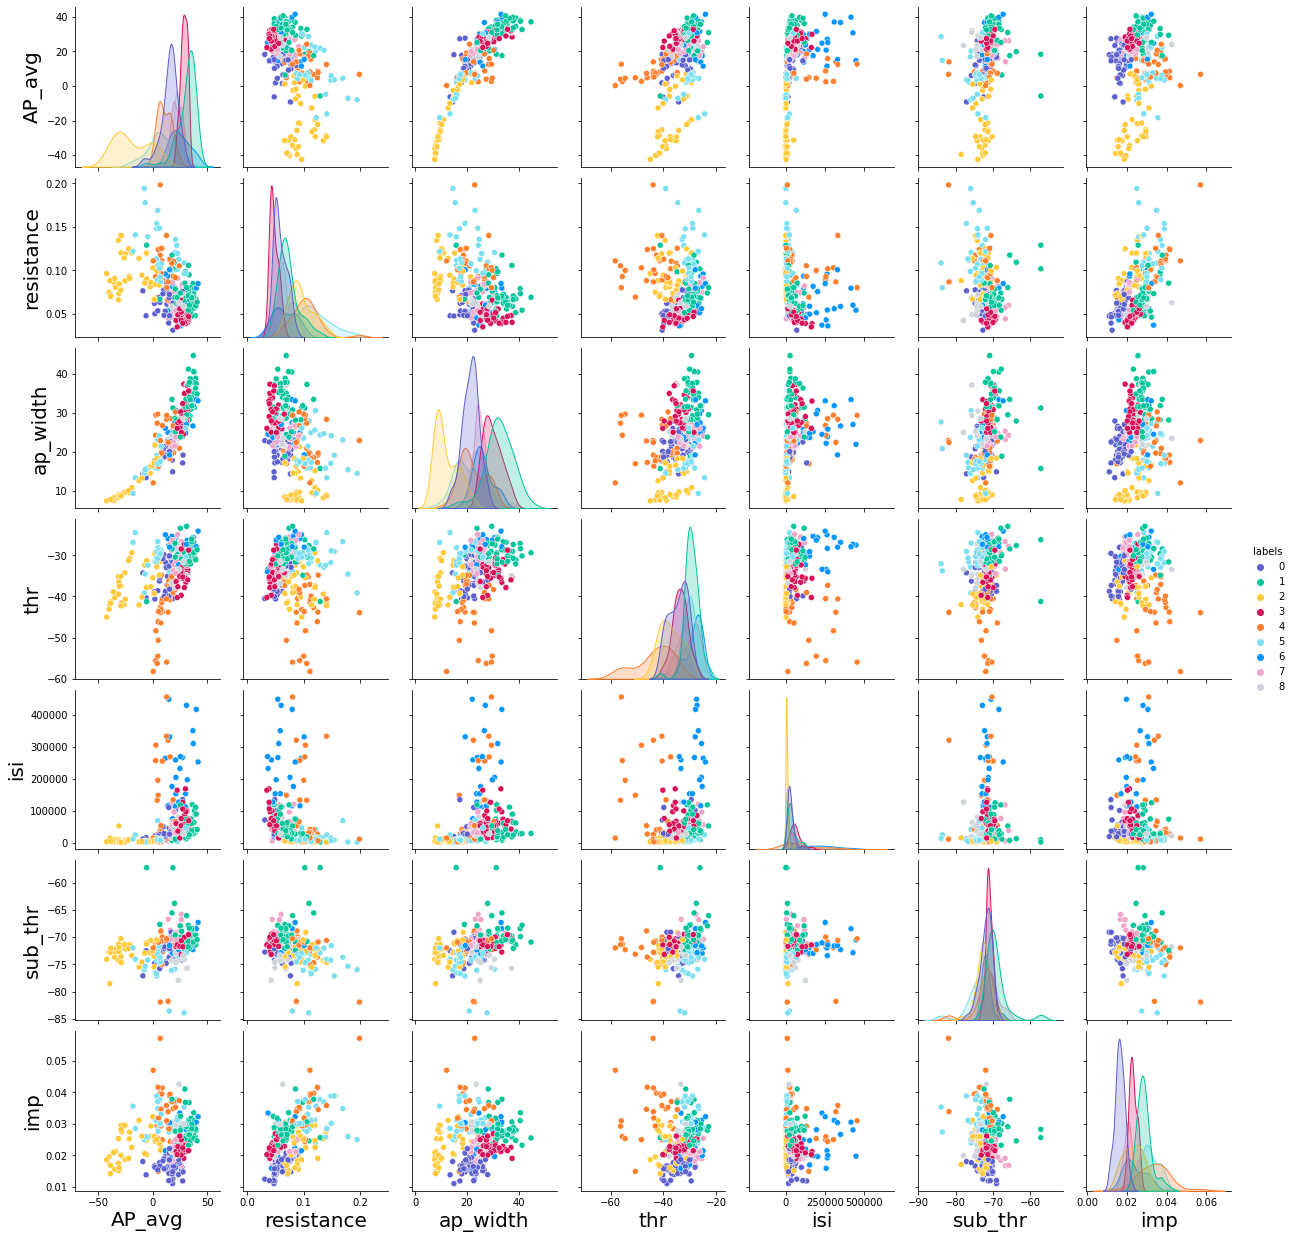

In [310]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(exc_df_acsf[['AP_avg','resistance','ap_width','thr','isi', 'sub_thr', 'imp','labels']],hue='labels',palette=CUSTOM_PAL_SORT_3[:len(set(exc_df_acsf['labels']))])


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:4.200e-14 U_stat=3.000e+00
1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.121e-09 U_stat=8.290e+02
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.448e-03 U_stat=4.770e+02
3 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:1.766e-06 U_stat=0.000e+00
0 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:6.515e-11 U_stat=8.000e+01
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.028e-09 U_stat=7.060e+02
2 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:1.037e-06 U_stat=2.000e+00
0 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.181e-05 U_stat=2.280e+02
1 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:2.536e-03 U_stat=7.400e+01
0 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:8.417e-08 U_stat=0.000e+00
p-value annotation 

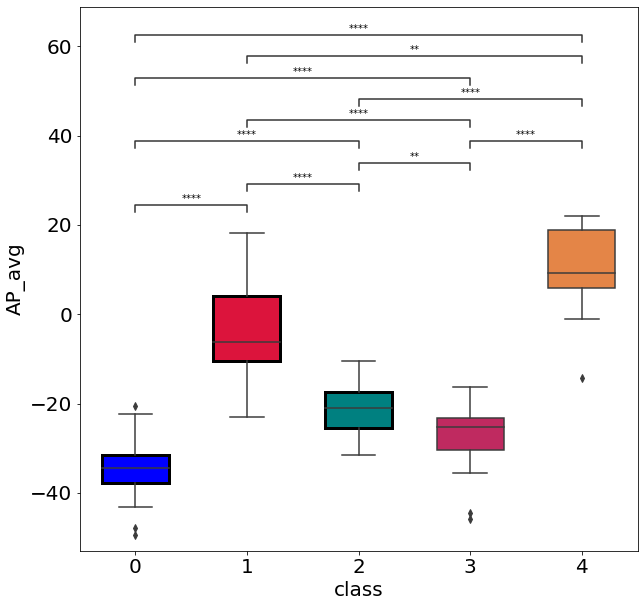

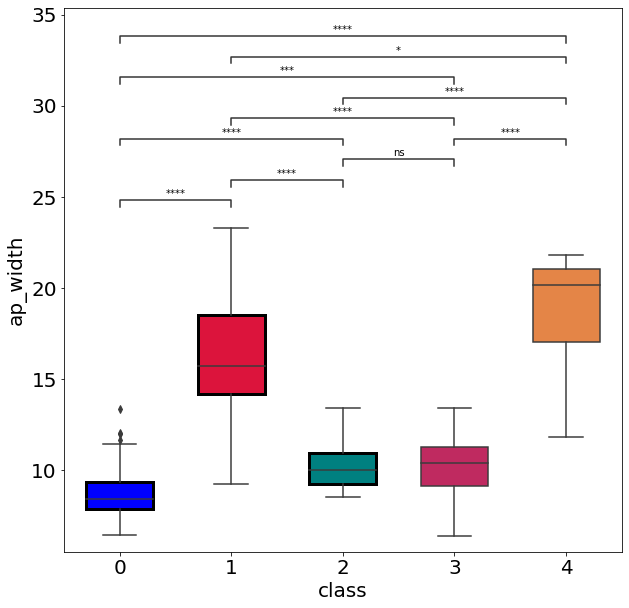

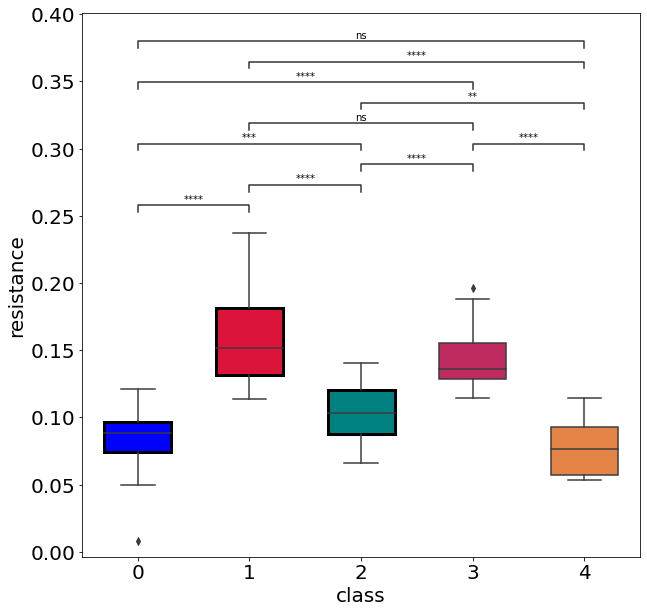

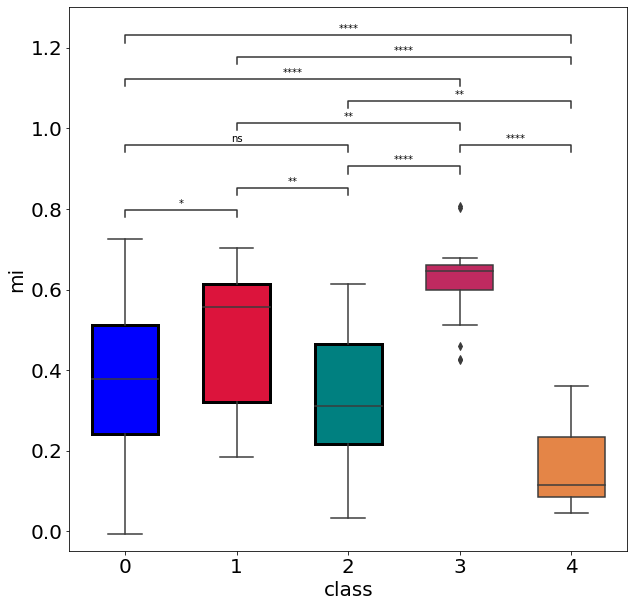

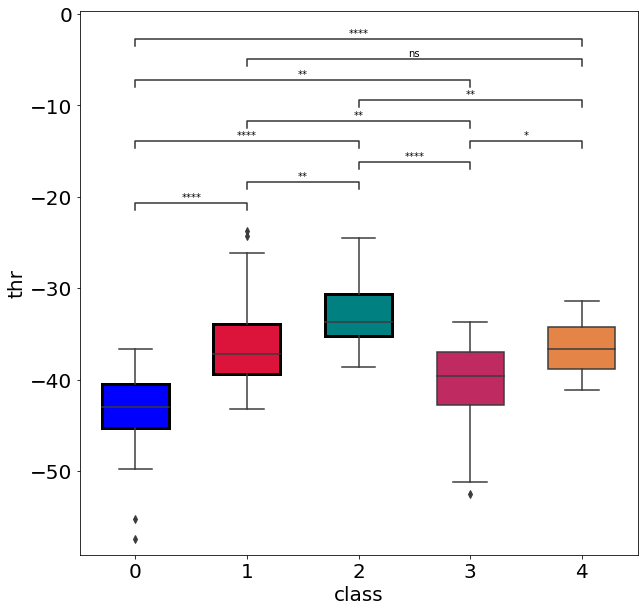

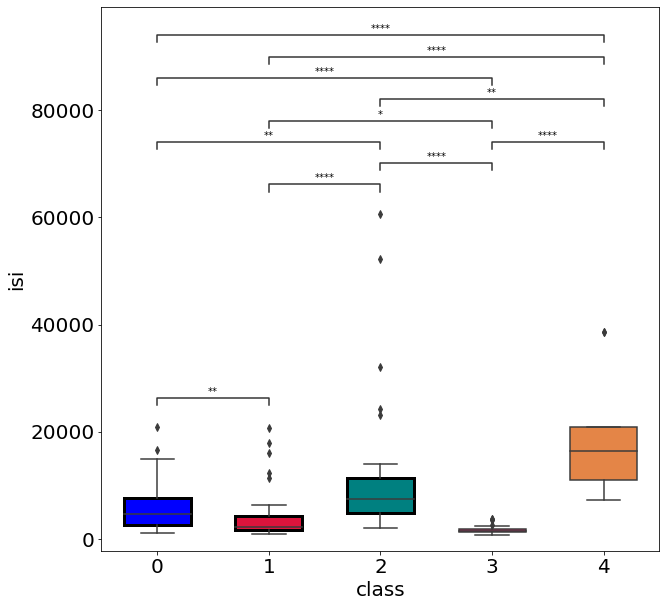

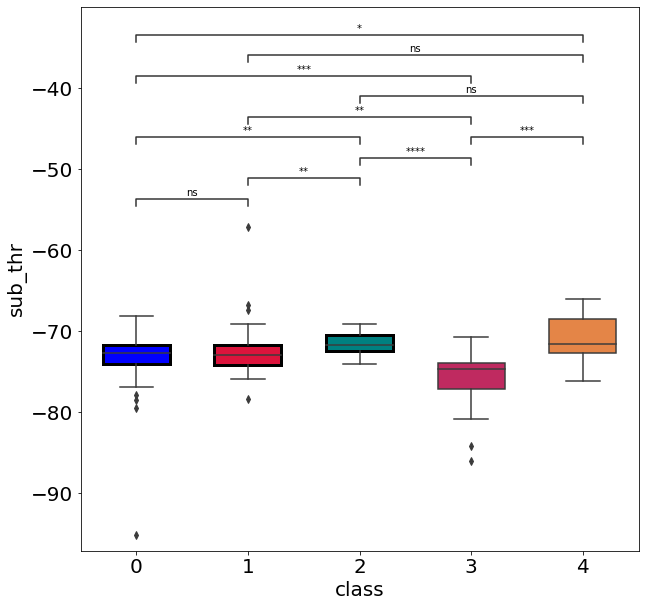

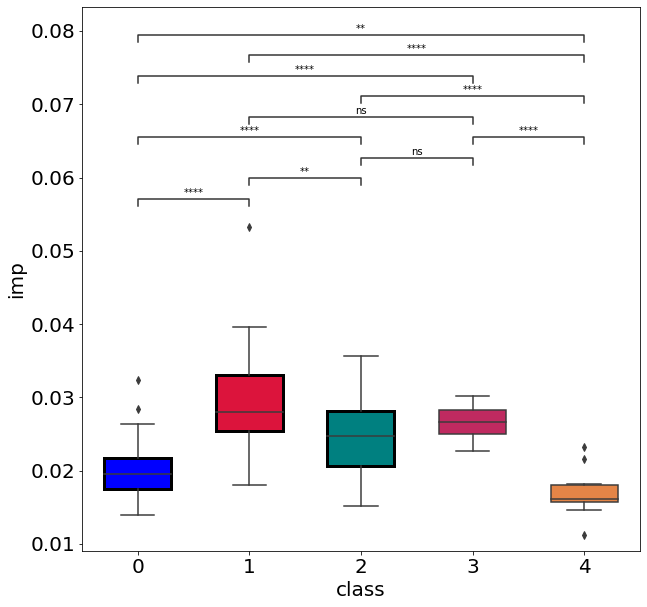

In [313]:
from itertools import combinations
from statannotations.Annotator import Annotator
def plot_significance_new(data,var,hue,ax,palette='mako',drug=False,test ='Mann-Whitney'):


    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    boxes = sns.boxplot(data=data,
                x=hue,
                y=var,
                width=.6, 
                palette=palette,
                ax=ax)
                          
    # sns.stripplot(x=hue, y=var , data=data,
    #             size=3, color=".4", linewidth=0,ax=ax)
    ax.set_xlabel('class',fontdict={'fontsize':20})
    ax.set_ylabel(var,fontdict={'fontsize':20})

    for box,col in zip(boxes.patches,['blue','crimson','teal']):
        mybox1 = box

        # Change the appearance of that box
        if drug:
            mybox1.set_facecolor('white')
            mybox1.set_edgecolor(col)
        else:
            mybox1.set_facecolor(col)
            mybox1.set_edgecolor('black')

        mybox1.set_linewidth(3)

    pairs = np.unique(data[hue])
    pairs = [i for i in combinations(pairs,2)]


    annotator = Annotator(ax,pairs, data=data, x=hue,palette=palette, y=var)
    annotator.configure(test=test, text_format='star', loc='inside')
    annotator.apply_and_annotate()  

for val in ['AP_avg','ap_width', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']:

    fig,ax = plt.subplots(1,1,figsize=[10,10])

    plot_significance_new(data = inh_df_acsf,
    var = val,
    hue = 'labels',
    ax = ax,
    drug = False,
    palette = CUSTOM_PAL_SORT_3[:len(set(exc_df_acsf['labels']))] )
    # plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/'+val+'_'+cond+'_dist.png',dpi=200)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.430e-13 U_stat=1.860e+02
1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.044e-15 U_stat=1.887e+03
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:9.729e-14 U_stat=0.000e+00
3 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:3.889e-12 U_stat=1.106e+03
4 vs. 5: Mann-Whitney-Wilcoxon test two-sided, P_val:4.173e-01 U_stat=4.890e+02
5 vs. 6: Mann-Whitney-Wilcoxon test two-sided, P_val:2.259e-05 U_stat=1.030e+02
6 vs. 7: Mann-Whitney-Wilcoxon test two-sided, P_val:3.578e-01 U_stat=2.940e+02
7 vs. 8: Mann-Whitney-Wilcoxon test two-sided, P_val:1.548e-01 U_stat=1.630e+02
0 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.531e-14 U_stat=1.896e+03
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.727e-04 U_stat=1.340e+03
2 vs. 4: Mann-Whitn

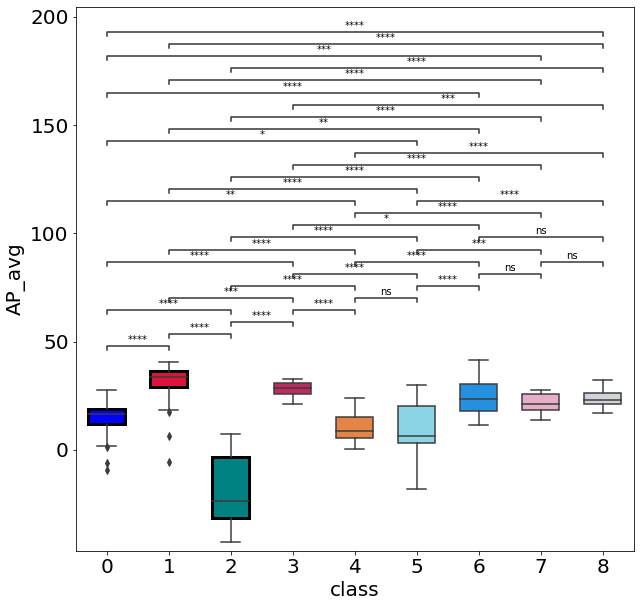

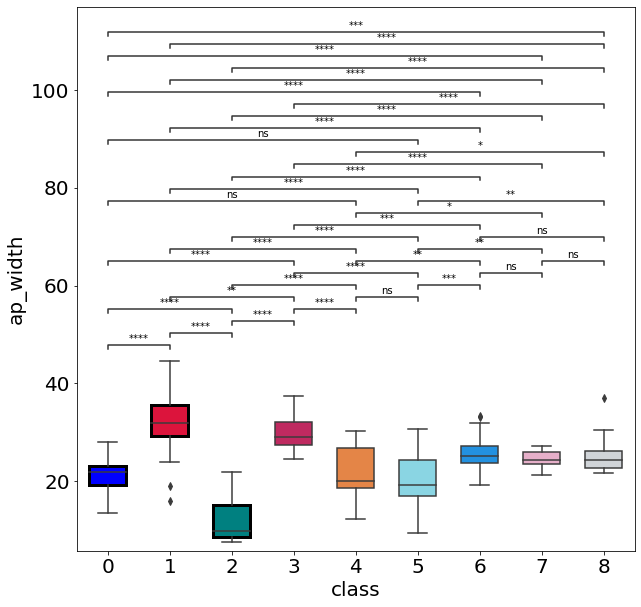

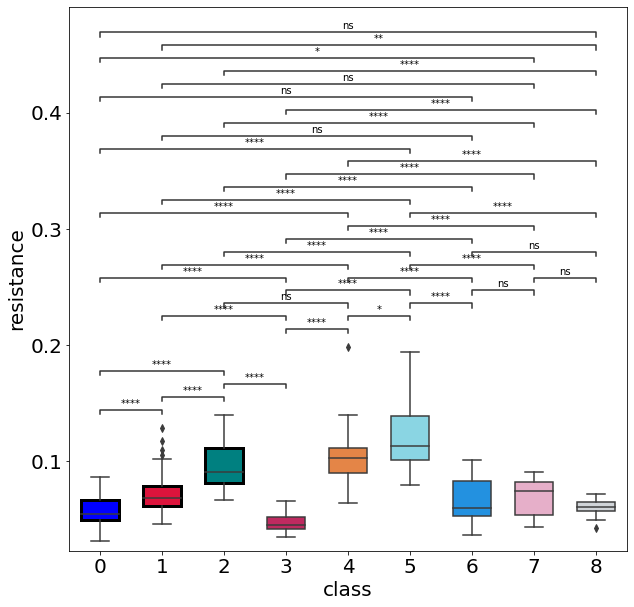

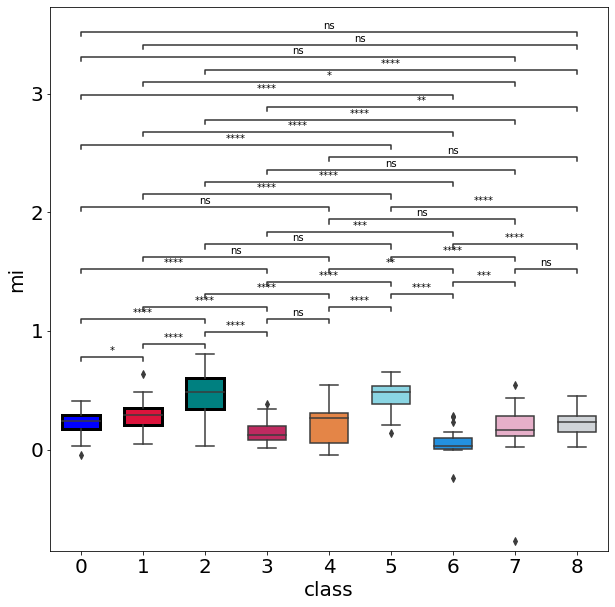

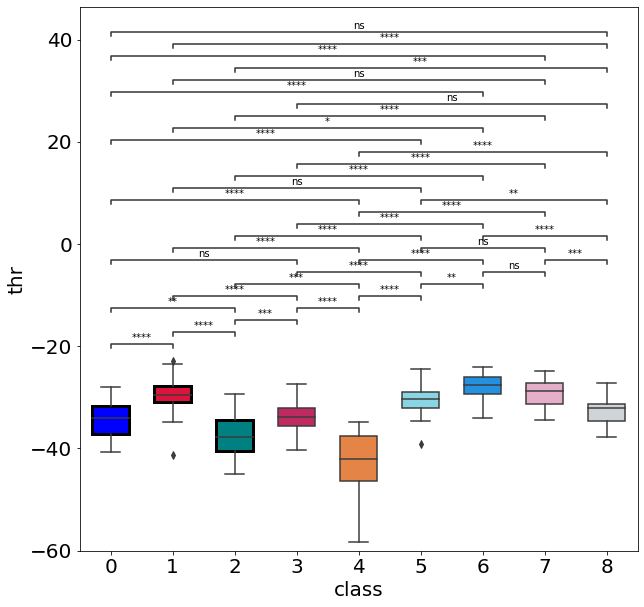

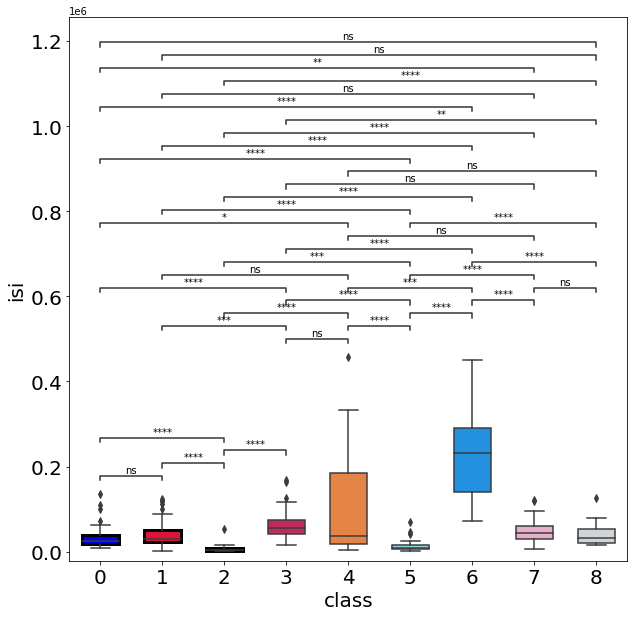

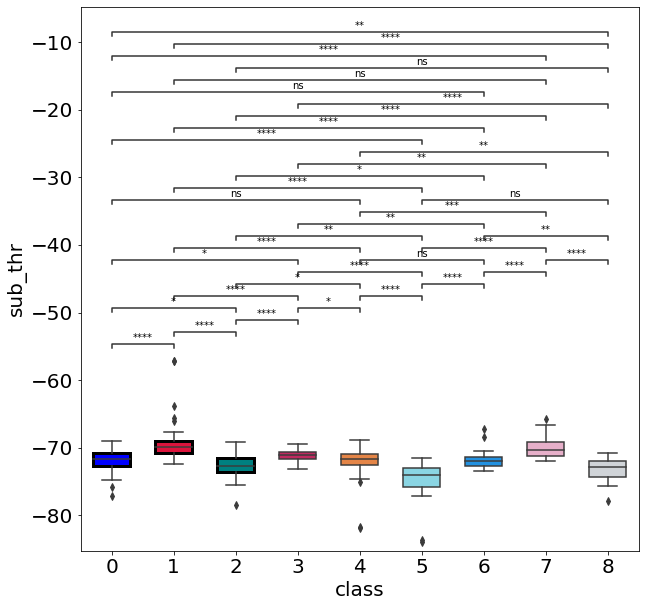

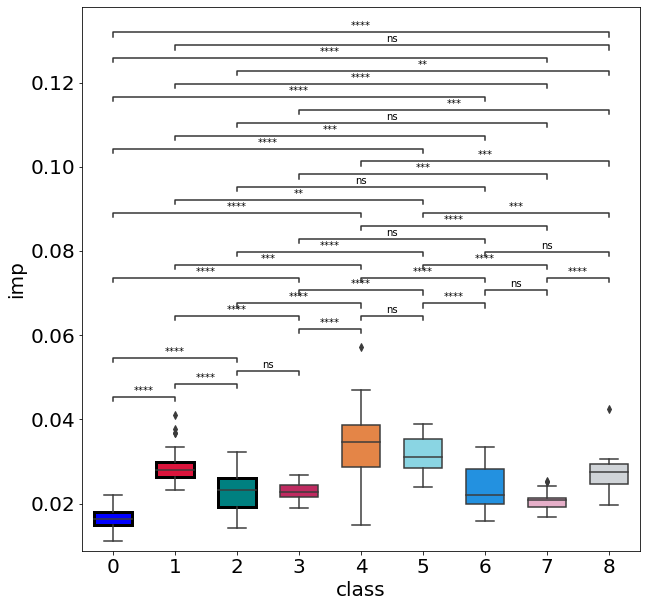

In [312]:
from itertools import combinations
from statannotations.Annotator import Annotator

def plot_significance_new(data,var,hue,ax,palette='mako',drug=False,test ='Mann-Whitney'):


    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    boxes = sns.boxplot(data=data,
                x=hue,
                y=var,
                width=.6, 
                palette=palette,
                ax=ax)
                          
    # sns.stripplot(x=hue, y=var , data=data,
    #             size=3, color=".4", linewidth=0,ax=ax)
    ax.set_xlabel('class',fontdict={'fontsize':20})
    ax.set_ylabel(var,fontdict={'fontsize':20})

    for box,col in zip(boxes.patches,['blue','crimson','teal']):
        mybox1 = box

        # Change the appearance of that box
        if drug:
            mybox1.set_facecolor('white')
            mybox1.set_edgecolor(col)
        else:
            mybox1.set_facecolor(col)
            mybox1.set_edgecolor('black')

        mybox1.set_linewidth(3)

    pairs = np.unique(data[hue])
    pairs = [i for i in combinations(pairs,2)]


    annotator = Annotator(ax,pairs, data=data, x=hue,palette=palette, y=var)
    annotator.configure(test=test, text_format='star', loc='inside')
    annotator.apply_and_annotate()  

for val in ['AP_avg', 'ap_width','resistance','mi', 'thr', 'isi', 'sub_thr','imp']:

    fig,ax = plt.subplots(1,1,figsize=[10,10])

    plot_significance_new(data = exc_df_acsf,
    var = val,
    hue = 'labels',
    ax = ax,
    drug = False,
    palette = CUSTOM_PAL_SORT_3[:len(set(exc_df_acsf['labels']))] )
    # plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/'+val+'_'+cond+'_dist.png',dpi=200)
